<a href="https://colab.research.google.com/github/rose-777/Projects/blob/main/Task15.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Build a spam filter using Python and the multinomial Naive Bayes algorithm.


Check Spam or Ham? Email Classifier Using Python using MultinomialNB.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#import scikitlearn as skplt

In [ ]:
d = pd.read_csv('/content/spam.csv')
d

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


Exploring the data

In [ ]:
d.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
d.tail()

,Category,Message
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...
5571,ham,Rofl. Its true to its name


In [ ]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [ ]:
d.shape

(5572, 2)

In [ ]:
d.columns

Index(['Category', 'Message'], dtype='object')

In [ ]:
d.describe()

,Category,Message
count,5572,5572
unique,2,5157
top,ham,"Sorry, I'll call later"
freq,4825,30


Checking for missing values and duplicate values

In [ ]:
d.isna().any()

Category    False
Message     False
dtype: bool

In [ ]:
d.isnull().sum()

Category    0
Message     0
dtype: int64

In [ ]:
d.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
5567    False
5568    False
5569    False
5570    False
5571    False
Length: 5572, dtype: bool

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


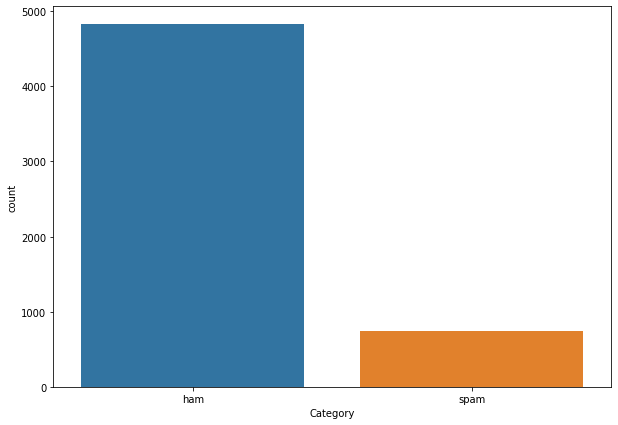

In [ ]:
plt.figure(figsize = (10,7))
sns.countplot(d.Category)
plt.show()

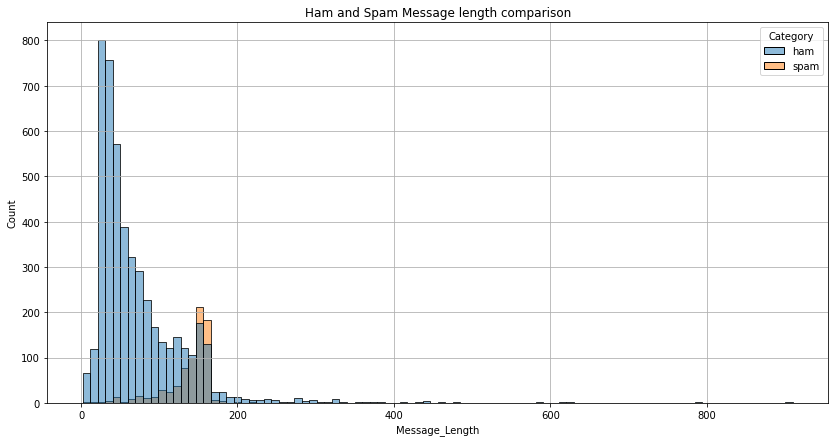

In [ ]:
plt.figure(figsize = (14,7))
d['Message_Length'] = d['Message'] .apply(len)
sns.histplot(x = d['Message_Length'], hue = d['Category'])
#plt.xlm((0,600))
plt.title('Ham and Spam Message length comparison')
plt.grid()
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder
l = LabelEncoder()

In [ ]:
d.Category = l.fit_transform(d. Category)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
textFeatures = d['Message'].copy()
vect = TfidfVectorizer('english')
x = vect.fit_transform(textFeatures)
y= d['Category']

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size= 0.2, random_state = 5)

In [ ]:
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB().fit(x_train,y_train)
print(mnb.predict(x_train))
print(y_train)

[0 0 1 ... 0 0 0]
1658    0
1509    0
3266    1
5199    0
3217    1
       ..
3046    0
1725    0
4079    0
2254    0
2915    1
Name: Category, Length: 4457, dtype: int64


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
pred = mnb.predict(x_train)
print(classification_report(y_train, pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      3855
           1       1.00      0.76      0.87       602

    accuracy                           0.97      4457
   macro avg       0.98      0.88      0.92      4457
weighted avg       0.97      0.97      0.97      4457



In [ ]:
print(confusion_matrix(y_train, pred))

[[3855    0]
 [ 142  460]]


In [ ]:
print(accuracy_score(y_train,pred))

0.9681400044873233
